In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart_df = pd.read_csv("heart.csv")
o2sat_df = pd.read_csv("o2Saturation.csv")

### Let's check the data

In [3]:
print(f'Shape of Heart DataSet is: {heart_df.shape}')
print(f'Shape of Oxygen Saturation Dataset: {o2sat_df.shape}')

Shape of Heart DataSet is: (303, 14)
Shape of Oxygen Saturation Dataset: (3585, 1)


In [4]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Brief Description of the columns
<p>Sex:</p> 
<p>Cp: Chest Pain Level</p>
<p>trtbps: Resting Blood Pressure in mm/Hg</p>
<p>chol: Cholesterol in mg/dl</p>
<p>fbs: fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</p>
<p>restecg: resting ECG results</p>
<p>thalachh: maximum heart rate achieved</p>
<p>exng: exercise induced angina</p>
<p>oldpeak: previous peak</p>
<p>slp slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping</p>
<p>ca: number of major vessels (0-3) colored by flourosopy</p>
<p>thall 3 = normal; 6 = fixed defect; 7 = reversable defect</p>
<p>output: Heart attack or not</p>

In [5]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Age and Heart Attack

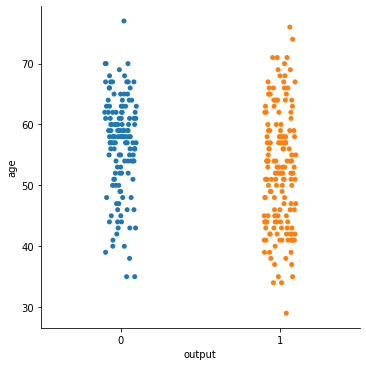

In [6]:
sns.catplot(x="output",y="age",data=heart_df)

#### From the plot it can be observed that everyone above 25 and below 75 years have chances of heart attack. 

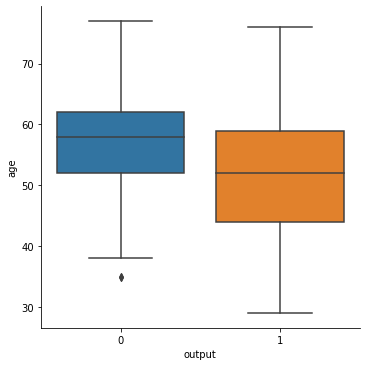

In [7]:
sns.catplot(x="output", y="age", kind="box", data=heart_df)

# Sex and Heart Attack

In [8]:
totalMale = (heart_df.sex == 1).sum()
maleTrue = ((heart_df.sex==1) & (heart_df.output == 1)).sum()
print(f'Total males: {totalMale}')
print(f'Male and Heart Attack: {maleTrue}')

Total males: 207
Male and Heart Attack: 93


In [9]:
totalFemale = (heart_df.sex == 0).sum()
femaleTrue = ((heart_df.sex==0) & (heart_df.output == 1)).sum()
print(f'Total females: {totalFemale}')
print(f'Female and Heart Attack: {femaleTrue}')

Total females: 96
Female and Heart Attack: 72


# Chest Pain and Heart Attack

In [10]:
print(f'Values in Chest Pain column: ')
print(heart_df.cp.value_counts())

Values in Chest Pain column: 
0    143
2     87
1     50
3     23
Name: cp, dtype: int64



-- Value 0: typical angina<br>
-- Value 1: atypical angina<br>
-- Value 2: non-anginal pain<br>
-- Value 3: asymptomatic<br>

In [21]:
cp0HeartAttack = ((heart_df.cp == 0) & (heart_df.output == 1)).sum()
cp1HeartAttack = ((heart_df.cp == 1) & (heart_df.output == 1)).sum()
cp2HeartAttack = ((heart_df.cp == 2) & (heart_df.output == 1)).sum()
cp3HeartAttack = ((heart_df.cp == 3) & (heart_df.output == 1)).sum()
print(f'Heart attack with Typical Angina: {cp0HeartAttack}')
print(f'Heart attack with Atypical Angina: {cp1HeartAttack}')
print(f'Heart attack with Non-anginal pain: {cp2HeartAttack}')
print(f'Heart attack with Asymptomatic: {cp3HeartAttack}')

Heart attack with Typical Angina: 39
Heart attack with Atypical Angina: 41
Heart attack with Non-anginal pain: 69
Heart attack with Asymptomatic: 16


# Rest Blood Pressure and Heart Attack

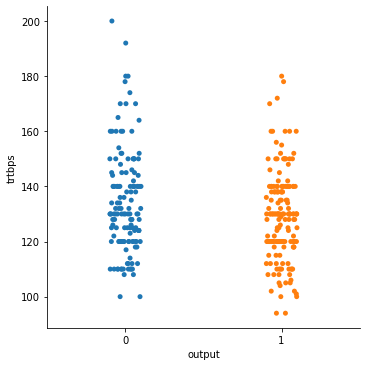

In [19]:
sns.catplot(x="output",y="trtbps", data=heart_df)

#### From this plot it is observed that people might have high or low blood pressure during heart attack. The same thing is also seen from research, that people might have high or low blood pressure during a heart  attack depending on how the body responds to it.
<a href="https://www.medicalnewstoday.com/articles/319319#what-is-the-connection-between-high-blood-pressure-and-heart-attacks">Article on blood pressure and heart attacks</a>

# Cholesterol and Heart Attack

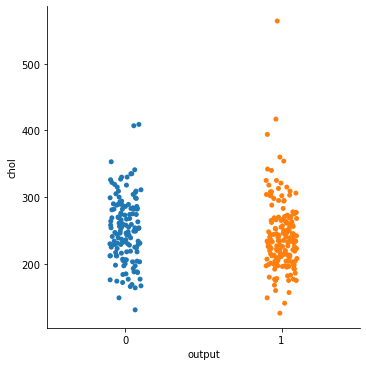

In [20]:
sns.catplot(x="output",y="chol", data=heart_df)

# Fasting Blood Sugar 

In [23]:
heart_df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [26]:
fbsHeartAttack = ((heart_df.fbs == 1) & (heart_df.output == 1)).sum()
noFbsHeartAttack = ((heart_df.fbs == 0) & (heart_df.output == 1)).sum()
print(f"Fasting blood sugar>120mg/dl who had heart attacks: {fbsHeartAttack}")
print(f"Fasting blood sugar<120mg/dl who had heart attacks: {noFbsHeartAttack}")

Fasting blood sugar>120mg/dl who had heart attacks: 23
Fasting blood sugar<120mg/dl who had heart attacks: 142
